### Importación de Tensorflow

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Importación de datos 

In [0]:
from tensorflow.keras.datasets.fashion_mnist import load_data
fashion_mnist = load_data()

(x_train, y_train), (x_test, y_test) = fashion_mnist

In [4]:
y_train.shape

(60000,)

In [5]:
x_train.shape

(60000, 28, 28)

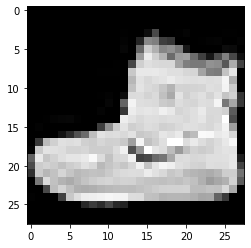

In [6]:
imagendemo = x_train[0]
plt.imshow(imagendemo, cmap = 'gray')

In [0]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item*255))) for item in row]) 
      for row in img]))

In [8]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0331518615   0   0 2551020   0   0   0   0 255 255   0
   0   0   0   0   0   0   0   0   0   0   0   0 765   0918034680323851581013770   0   0   0 255 7651020   0   0 765
   0   0   0   0   0   0   0   0   0   0   0   01530   02601052020448803417036720313655865   0   0   0   030602550   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   039525601805278545390272853978041055277951632058651963533150183603825
   0   0   0   0   0   0   0   0   0   0   0 255   0175955278556865555905508055080415653238530855311103723035955224404386016830
   0   0   0   0   0   0   0   0   0 255 255 255   0510005

## Preparando los datos para el entrenamiento
 
La x debe ser convertida a un vector para que pueda ser procesada por la red perceptrón profunda 

In [9]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32')
x_test = x_test.reshape(-1, 28 * 28).astype('float32')
x_train.shape

(60000, 784)

In [10]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Normalizar los datos [0, 1] para aumentar la velocidad de entrenamiento.

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Las salidas y deben se codificadas en one hot

In [12]:
# Onehot encode
onehot_encoder = OneHotEncoder(sparse = False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

## Declarando la arquitectura -- keras secuencial

Generando función 

 


In [0]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1024, input_shape = (784,) , activation = 'relu'))
model1.add(tf.keras.layers.Dense(512, activation = 'relu'))
model1.add(tf.keras.layers.Dense(256, activation = 'relu'))
model1.add(tf.keras.layers.Dense(128, activation = 'relu'))
model1.add(tf.keras.layers.Dense(10))

Seleccionar una funcion de error, optimizador y metricas de evaluacion 

In [0]:
model1.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = tf.nn.softmax_cross_entropy_with_logits, metrics = ['accuracy'])

## Función de entrenamiento  y prueba

In [18]:
model1.fit(x = x_train, y = y_train_onehot, batch_size = 300, epochs = 100, validation_data = (x_test, y_test_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0319 - accuracy: 0.9886 - val_loss: 0.7284 - val_accuracy: 0.8977
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0184 - accuracy: 0.9935 - val_loss: 0.7919 - val_accuracy: 0.8976
Epoch 3/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0243 - accuracy: 0.9918 - val_loss: 0.7830 - val_accuracy: 0.8978
Epoch 4/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0257 - accuracy: 0.9907 - val_loss: 0.7288 - val_accuracy: 0.8945
Epoch 5/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0242 - accuracy: 0.9912 - val_loss: 0.7962 - val_accuracy: 0.8951
Epoch 6/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0231 - accuracy: 0.9920 - val_loss: 0.7174 - val_accuracy: 0.8976
Epoch 7/100
60000/60000 [=========================

## Declarando la arquitectura -- keras model class

Generando función 


In [0]:
class Model2(tf.keras.Model):
  def __init__(self):
    super(Model2, self).__init__()
    self.HL1 = tf.keras.layers.Dense(1024, input_shape = (784,), activation = 'relu')
    self.HL2 = tf.keras.layers.Dense(512, activation = 'relu')
    self.HL3 = tf.keras.layers.Dense(256, activation = 'relu')
    self.HL4 = tf.keras.layers.Dense(128, activation = 'relu')
    self.out = tf.keras.layers.Dense(10)

    # Seleccionar una funcion de error, optimizador y metricas de evaluacion 
    self.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = tf.nn.softmax_cross_entropy_with_logits, metrics = ['accuracy'])

  def call(self, inputs):
    x = self.HL1(inputs)
    x = self.HL2(x)
    x = self.HL3(x)
    x = self.HL4(x)
    x = self.out(x)
    return x

## Función de entrenamiento  y prueba

In [0]:
model2 = Model2()

In [24]:
model2.fit(x = x_train, y = y_train_onehot, batch_size = 300, epochs = 100, validation_data = (x_test,y_test_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.1033 - accuracy: 0.9599 - val_loss: 0.4390 - val_accuracy: 0.8962
Epoch 2/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0951 - accuracy: 0.9629 - val_loss: 0.4579 - val_accuracy: 0.8935
Epoch 3/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0982 - accuracy: 0.9620 - val_loss: 0.4572 - val_accuracy: 0.8945
Epoch 4/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0894 - accuracy: 0.9654 - val_loss: 0.4844 - val_accuracy: 0.8962
Epoch 5/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0840 - accuracy: 0.9682 - val_loss: 0.4980 - val_accuracy: 0.8909
Epoch 6/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0863 - accuracy: 0.9667 - val_loss: 0.5047 - val_accuracy: 0.8954
Epoch 7/100
60000/60000 [=========================